Descriptive Statistics for Salary:
count    20.000000
mean      0.397222
std       0.357431
min       0.000000
25%       0.072222
50%       0.350000
75%       0.791667
max       1.000000
Name: Salary, dtype: float64

Average Salary by Position (Before Scaling):
Position
Junior Developer     54750.000000
Lead Developer      129666.666667
Senior Developer     83166.666667
Name: Salary, dtype: float64


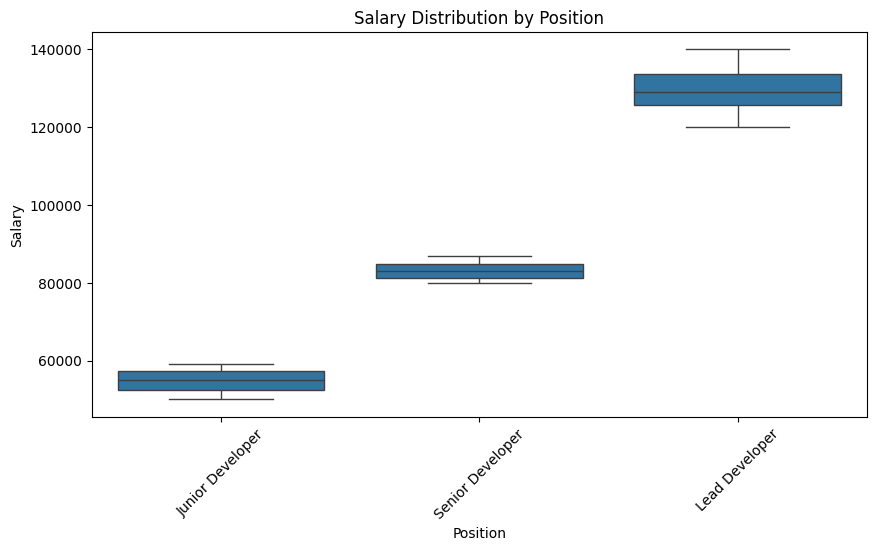

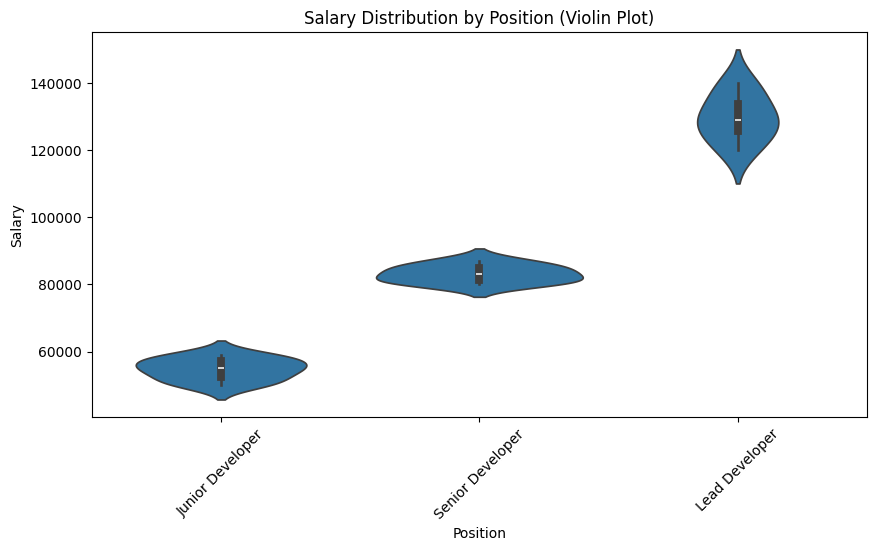


Correlation Matrix between Salary and Years of Service:
                    Salary  Years_of_Service
Salary            1.000000          0.942119
Years_of_Service  0.942119          1.000000


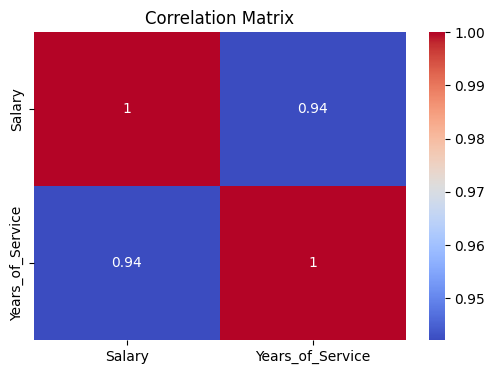


Model Performance Metrics:
R-squared: 0.942572426396812
Mean Absolute Error (MAE): 0.06976650563607081
Mean Squared Error (MSE): 0.0054928410677864085


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Create a sample dataset for employee salary analysis
data = {
    'Employee_ID': range(1, 21),
    'Position': ['Junior Developer', 'Senior Developer', 'Lead Developer', 'Junior Developer', 'Senior Developer',
                 'Lead Developer', 'Junior Developer', 'Senior Developer', 'Lead Developer', 'Junior Developer',
                 'Junior Developer', 'Senior Developer', 'Lead Developer', 'Junior Developer', 'Senior Developer',
                 'Lead Developer', 'Junior Developer', 'Senior Developer', 'Lead Developer', 'Junior Developer'],
    'Department': ['IT', 'IT', 'IT', 'HR', 'HR', 'HR', 'Sales', 'Sales', 'Sales', 'Finance',
                   'Finance', 'Finance', 'Marketing', 'Marketing', 'Marketing', 'Operations', 'Operations', 'Operations', 'Admin', 'Admin'],
    'Salary': [50000, 80000, 120000, 55000, 85000, 130000, 57000, 87000, 135000, 59000,
               51000, 81000, 125000, 53000, 82000, 128000, 55000, 84000, 140000, 58000],
    'Years_of_Service': [2, 5, 8, 3, 6, 9, 2, 5, 8, 3, 4, 7, 10, 2, 6, 9, 3, 7, 10, 4]
}

# Convert the data into a pandas DataFrame
employee_data = pd.DataFrame(data)

# Step 2: Data Preprocessing

# Handle missing values (if any)
employee_data.dropna(subset=['Salary'], inplace=True)

# Encode categorical columns ('Position' and 'Department') using one-hot encoding
employee_data = pd.get_dummies(employee_data, columns=['Position', 'Department'])

# Normalize salary using MinMaxScaler
scaler = MinMaxScaler()
employee_data['Salary'] = scaler.fit_transform(employee_data[['Salary']])

# Step 3: Exploratory Data Analysis (EDA)

# Descriptive statistics for salary
salary_stats = employee_data['Salary'].describe()
print("Descriptive Statistics for Salary:")
print(salary_stats)

# Average salary by position (before scaling)
avg_salary_by_position = pd.DataFrame(data).groupby('Position')['Salary'].mean()
print("\nAverage Salary by Position (Before Scaling):")
print(avg_salary_by_position)

# Visualizing the salary distribution by position using a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Position', y='Salary', data=pd.DataFrame(data))
plt.title('Salary Distribution by Position')
plt.xticks(rotation=45)
plt.show()

# Violin plot to visualize the salary distribution
plt.figure(figsize=(10, 5))
sns.violinplot(x='Position', y='Salary', data=pd.DataFrame(data))
plt.title('Salary Distribution by Position (Violin Plot)')
plt.xticks(rotation=45)
plt.show()

# Step 4: Correlation Analysis

# Correlation matrix for numerical variables (Salary and Years of Service)
correlation_matrix = employee_data[['Salary', 'Years_of_Service']].corr()
print("\nCorrelation Matrix between Salary and Years of Service:")
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Linear Regression to predict Salary based on Years of Service and Position

# Define features (X) and target (y)
X = employee_data.drop(columns=['Salary', 'Employee_ID'])  # Drop target and ID column
y = employee_data['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Performance Metrics:")
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
